In [3]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

plt.rcParams["figure.figsize"] = (20,8)
sid = SentimentIntensityAnalyzer()
essays = pd.read_csv("C:\\Speicher\\Uni\\SocialMediaAnalysis\\ChatGBT\\preprocessed_data.csv", sep=";", encoding="UTF-8")


sentiments = [[]]
def get_sentiment(essay):
    ss = sid.polarity_scores(essay)
    #print(essay + "\n---> " + str(ss))
    return(ss.get('compound'))

def plot_smooth(x, y, label, color):
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = label, color = color)

def plot_not_smooth(x, y, label, color):
    plt.plot(x, y, label = label, color = color)

essays["Student Essay sentiment score"] = essays["Student Essay"].apply(lambda x: get_sentiment(x))
essays["ChatGPT Essay 0.2 sentiment score"] = essays["ChatGPT Essay 0.2"].apply(lambda x: get_sentiment(x))
essays["ChatGPT Essay 0.9 sentiment score"] = essays["ChatGPT Essay 0.9"].apply(lambda x: get_sentiment(x))
essays["Topic sentiment score"] = essays["Topic"].apply(lambda x: get_sentiment(x))

average_score_chatgpt = (np.array(essays["ChatGPT Essay 0.2 sentiment score"]) + np.array(essays["ChatGPT Essay 0.9 sentiment score"])) / 2
difference = np.array(essays["Student Essay sentiment score"]) - average_score_chatgpt


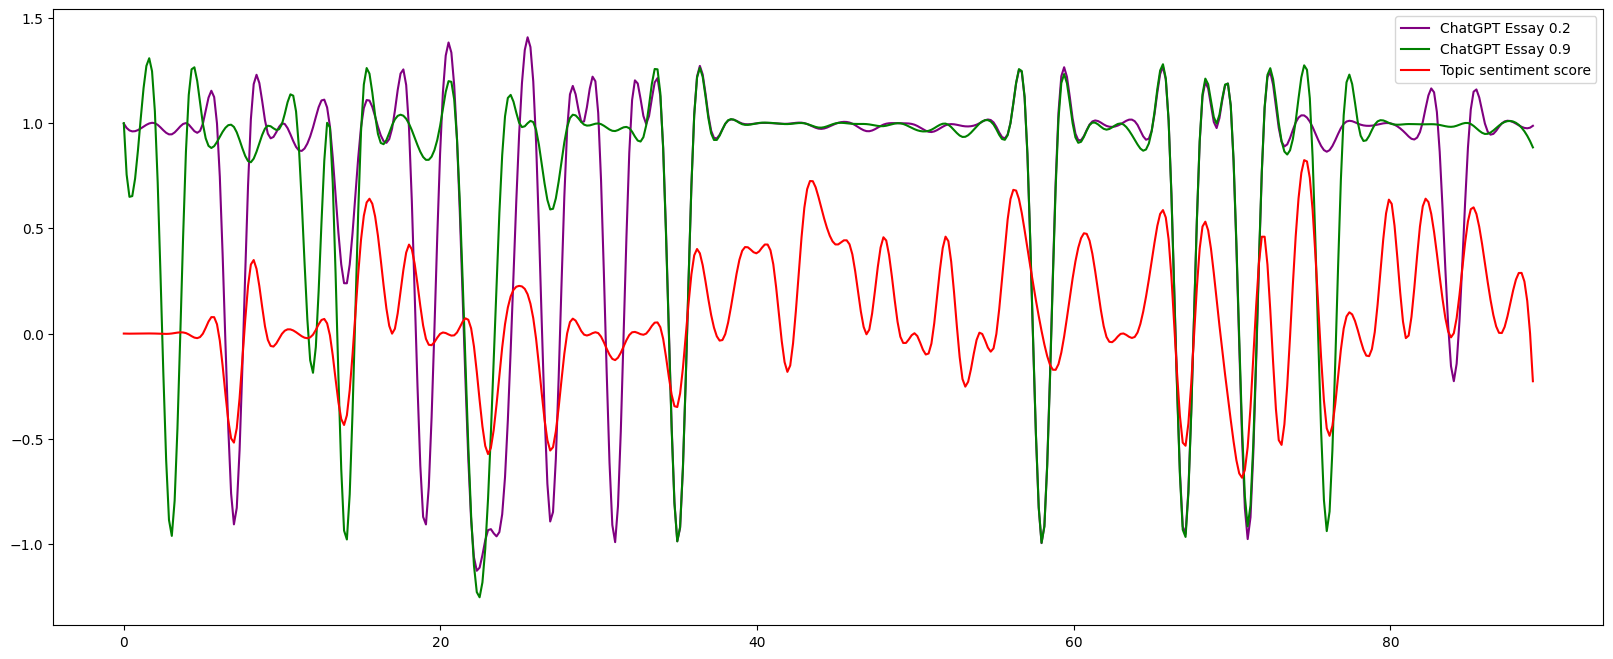

In [4]:
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2 sentiment score"], "ChatGPT Essay 0.2", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9 sentiment score"], "ChatGPT Essay 0.9", "green")
plot_smooth(essays["Unnamed: 0"], essays["Topic sentiment score"], "Topic sentiment score", "red")
plt.legend()
plt.show()

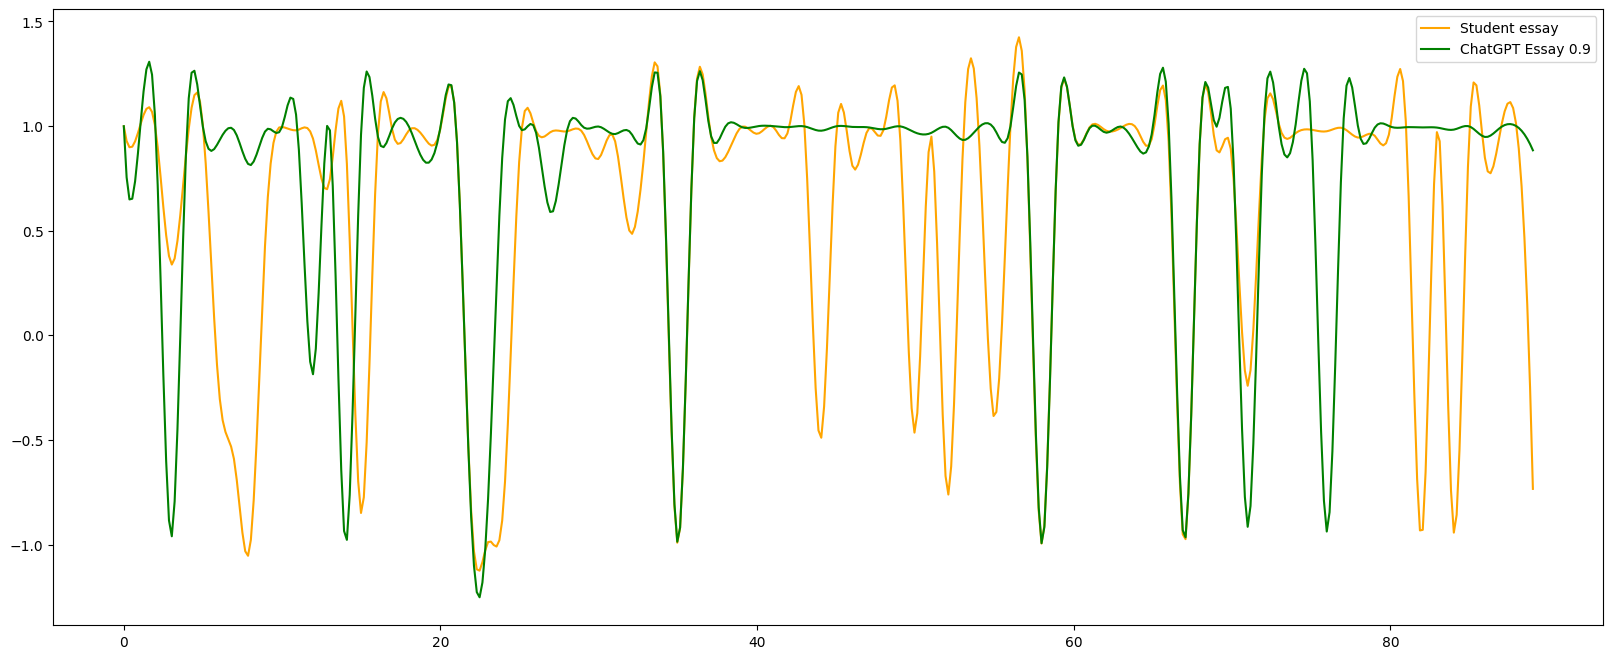

In [5]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay sentiment score"], "Student essay", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9 sentiment score"], "ChatGPT Essay 0.9", "green")
plt.legend()
plt.show()

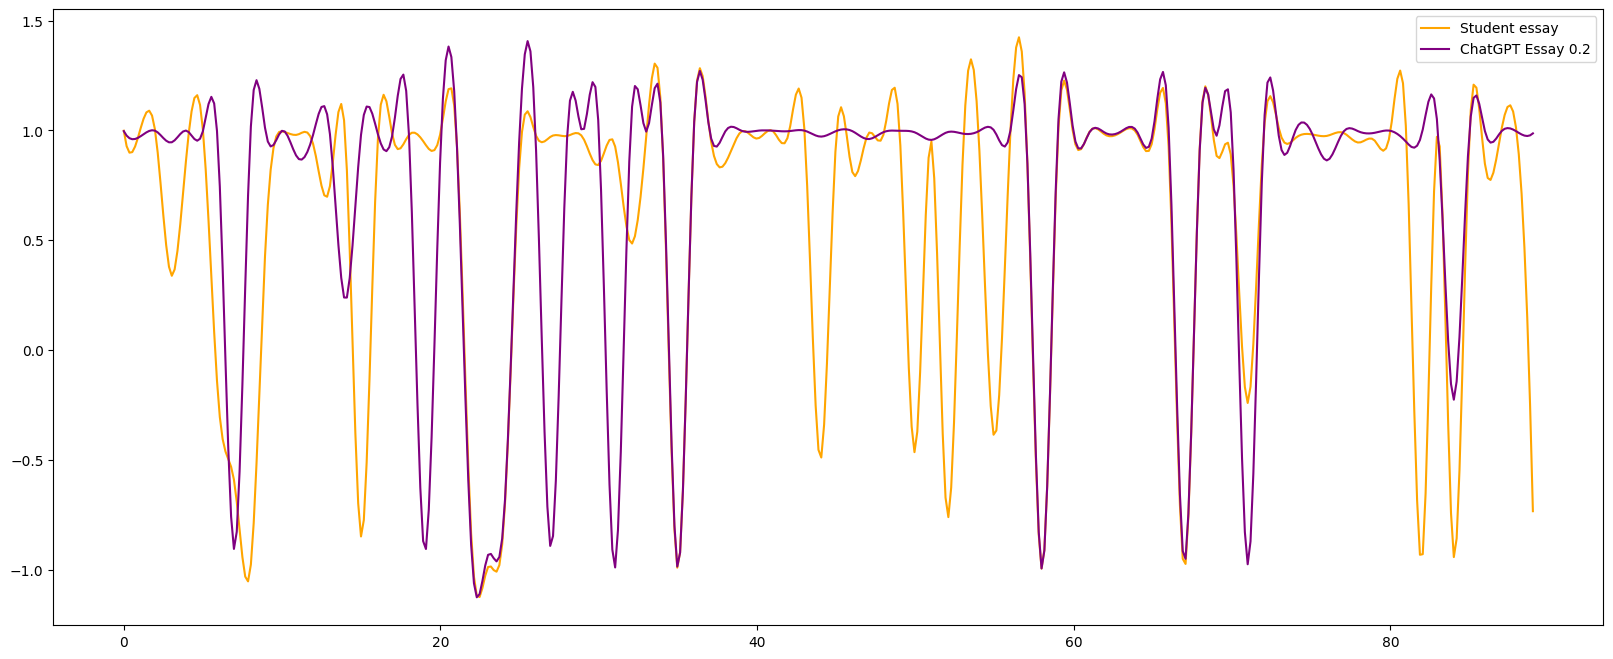

In [6]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay sentiment score"], "Student essay", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2 sentiment score"], "ChatGPT Essay 0.2", "purple")
plt.legend()
plt.show()

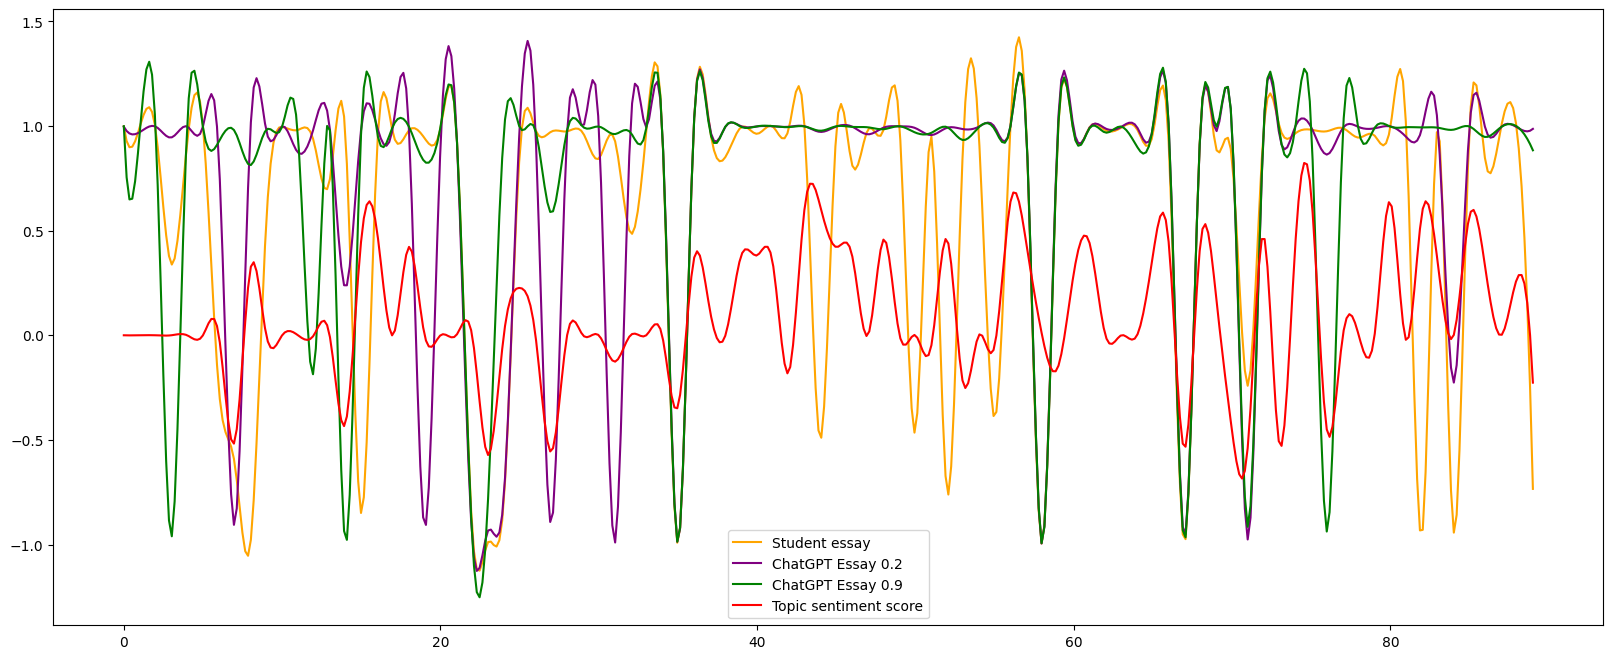

In [7]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay sentiment score"], "Student essay", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2 sentiment score"], "ChatGPT Essay 0.2", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9 sentiment score"], "ChatGPT Essay 0.9", "green")
plot_smooth(essays["Unnamed: 0"], essays["Topic sentiment score"], "Topic sentiment score", "red")
plt.legend()
plt.show()


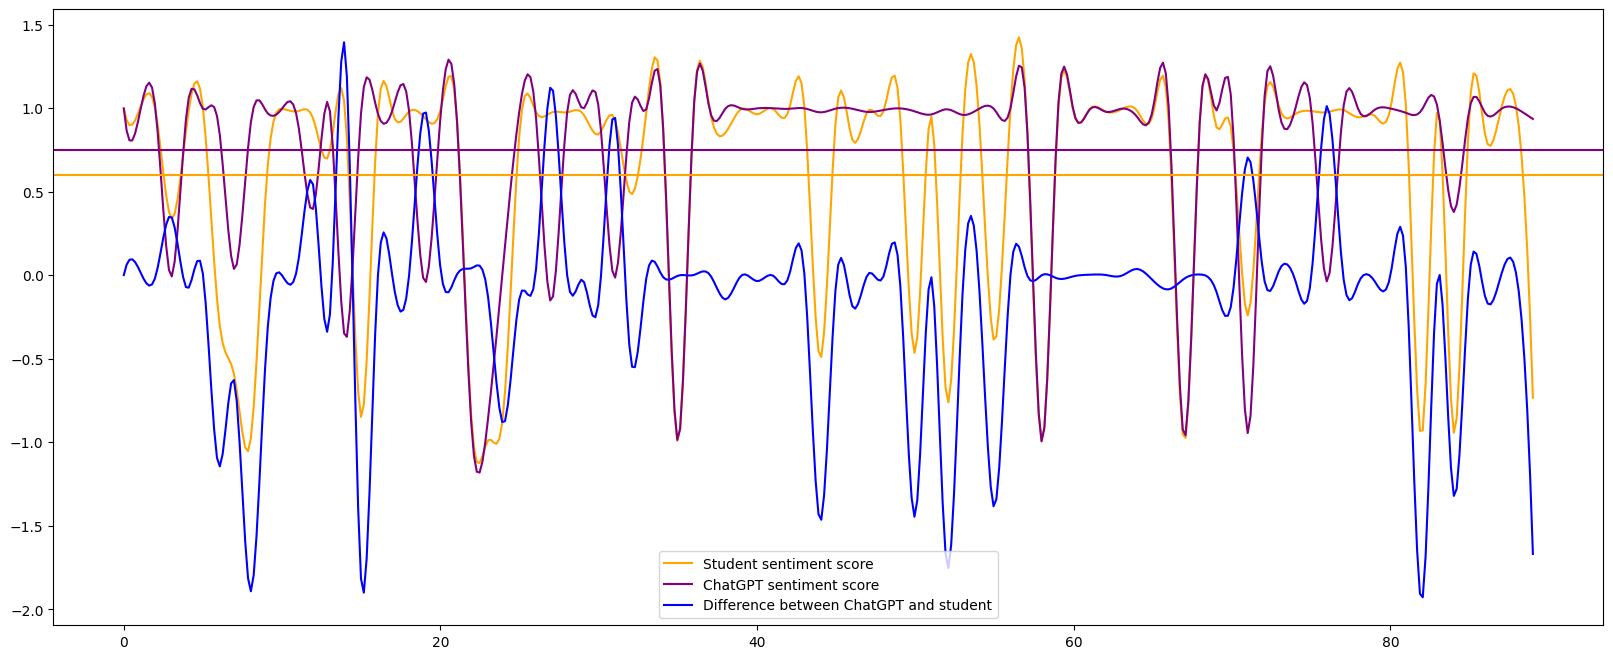

In [8]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay sentiment score"], "Student sentiment score", "orange")
plot_smooth(essays["Unnamed: 0"], average_score_chatgpt, "ChatGPT sentiment score", "purple")
plot_smooth(essays["Unnamed: 0"], difference, "Difference between ChatGPT and student", "blue")
plt.axhline(y=np.nanmean(essays["Student Essay sentiment score"]), color = "orange")
plt.axhline(y=np.nanmean(average_score_chatgpt), color = "purple")
plt.legend()
plt.show()


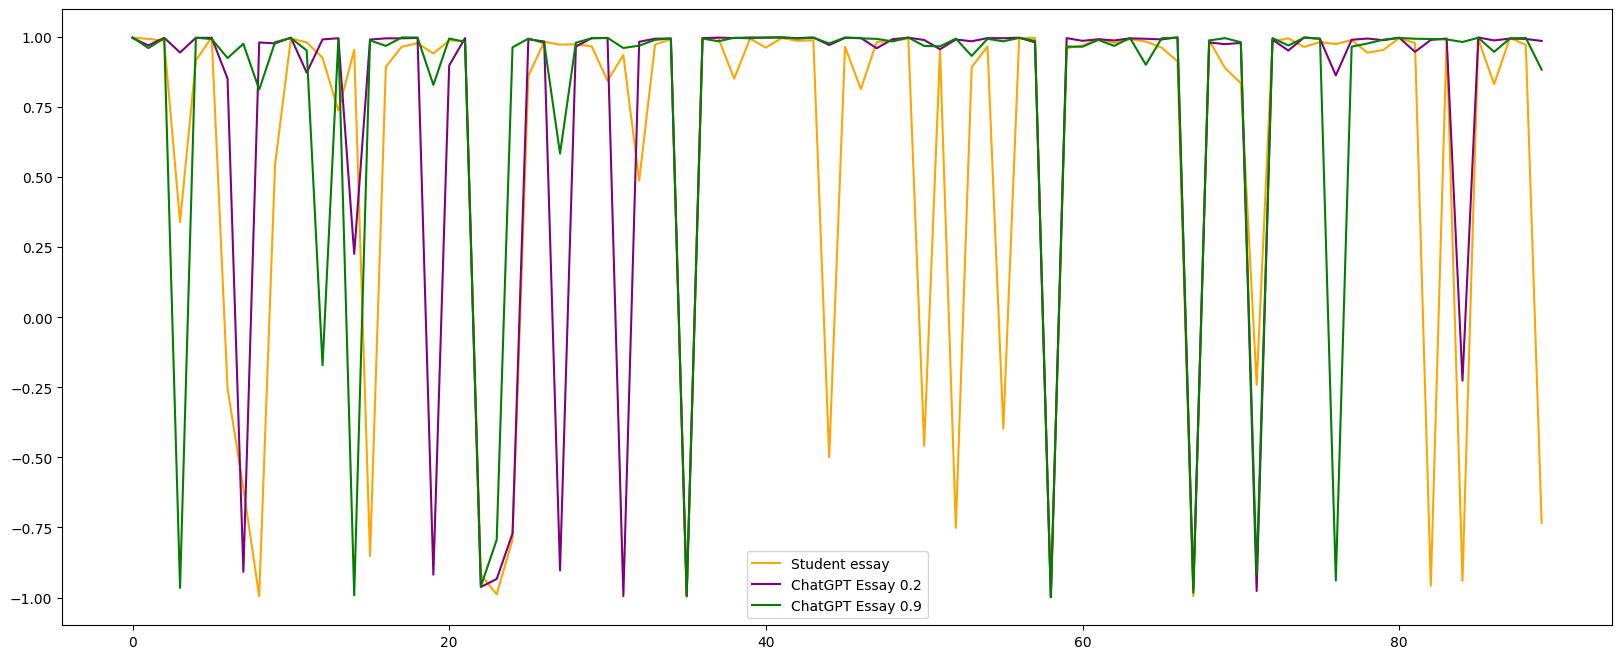

In [9]:
plt.plot(essays["Unnamed: 0"], essays["Student Essay sentiment score"], label = "Student essay", color = "orange")
plt.plot(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2 sentiment score"], label = "ChatGPT Essay 0.2", color = "purple")
plt.plot(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9 sentiment score"], label = "ChatGPT Essay 0.9", color = "green")
plt.legend()
plt.show()

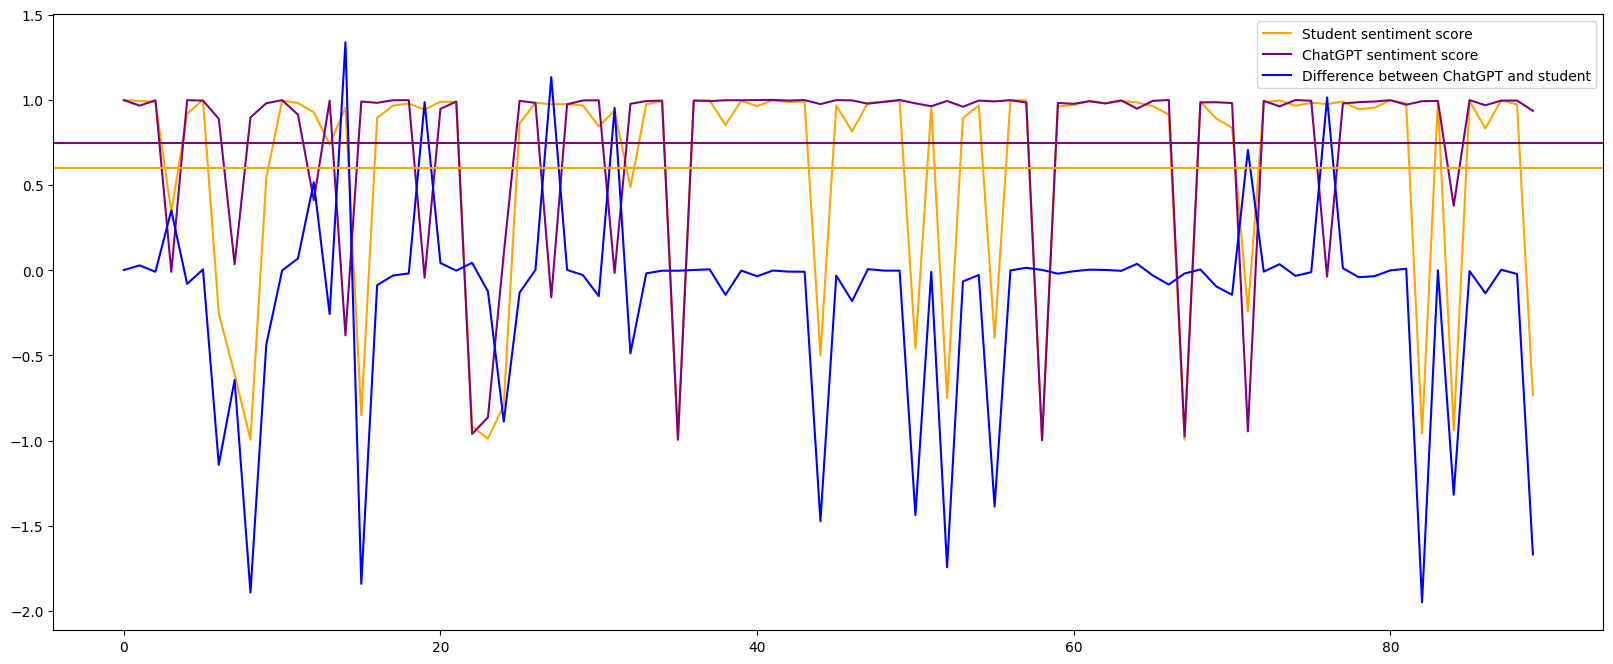

In [10]:
plt.plot(essays["Unnamed: 0"], essays["Student Essay sentiment score"], label = "Student sentiment score", color = "orange")
plt.plot(essays["Unnamed: 0"], average_score_chatgpt, label = "ChatGPT sentiment score", color = "purple")
plt.plot(essays["Unnamed: 0"], difference, label = "Difference between ChatGPT and student", color = "blue")
plt.axhline(y=np.nanmean(essays["Student Essay sentiment score"]), color = "orange")
plt.axhline(y=np.nanmean(average_score_chatgpt), color = "purple")
plt.legend()
plt.show()